<a href="https://colab.research.google.com/github/katiacardoso/AI-Analysis-of-Harry-Potter/blob/main/AI_Analysis_of_Harry_Potter_Unique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

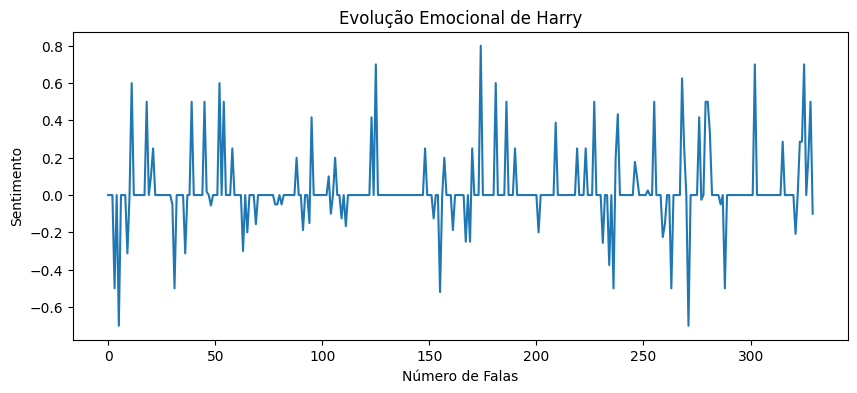

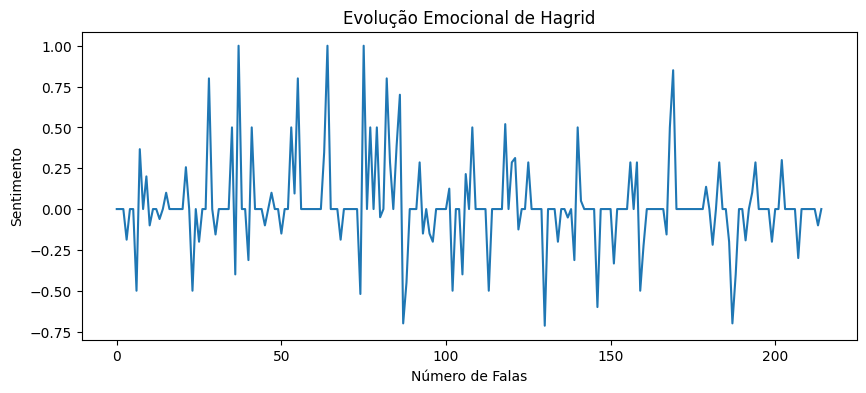

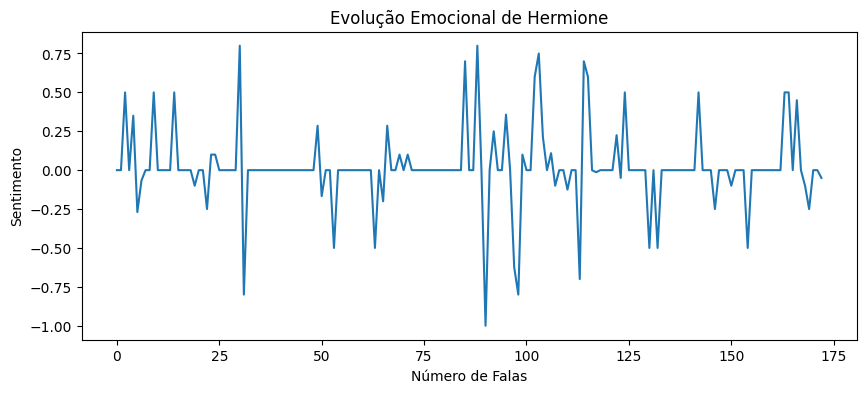

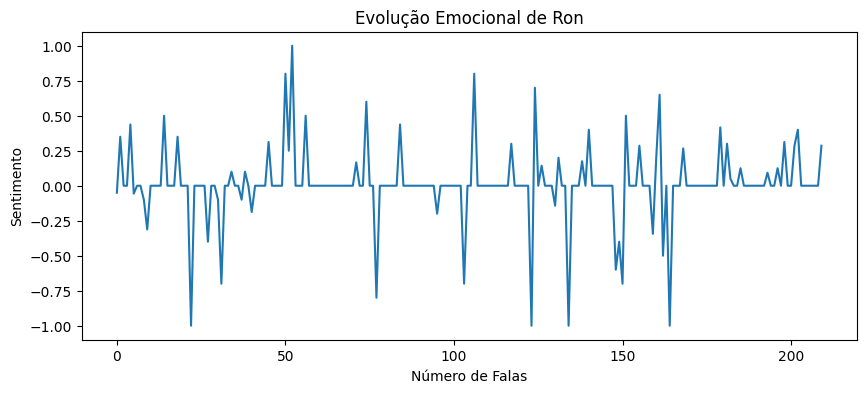

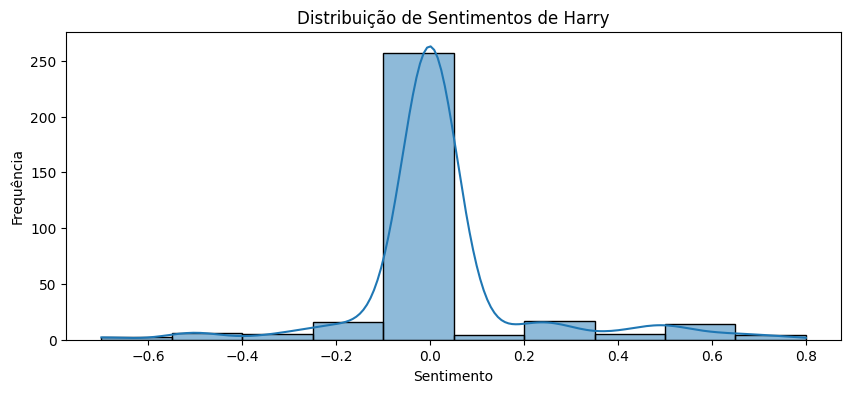

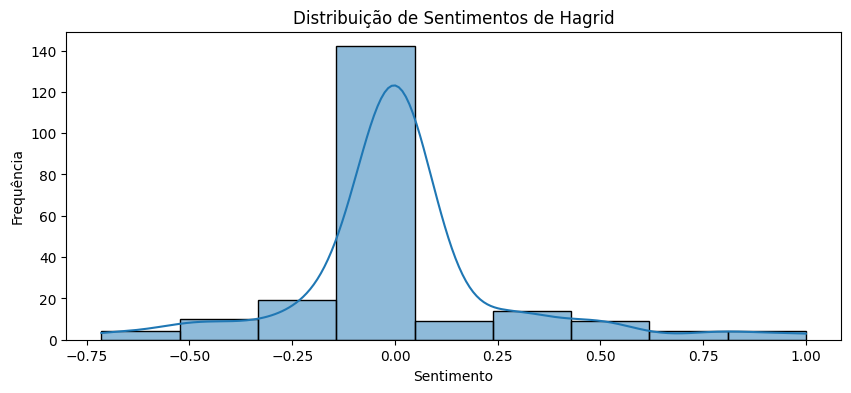

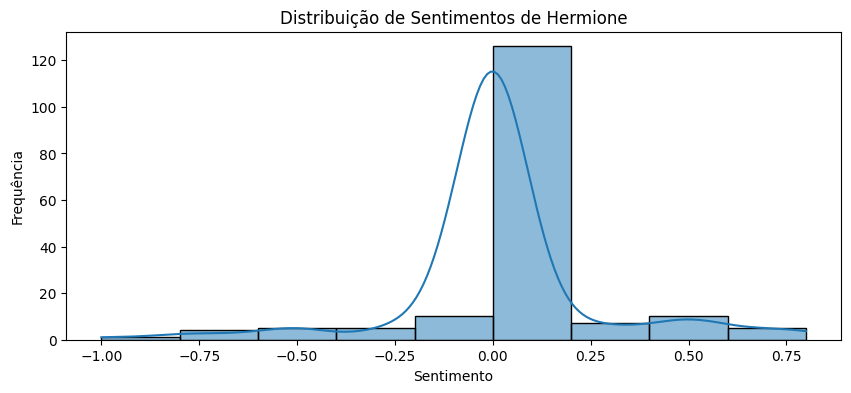

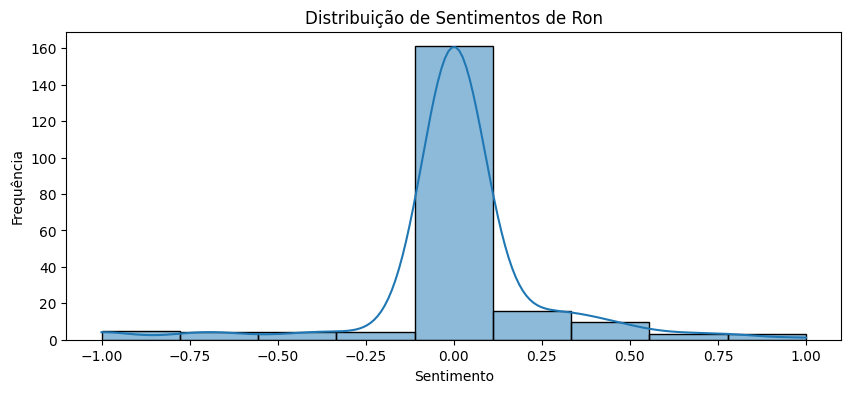

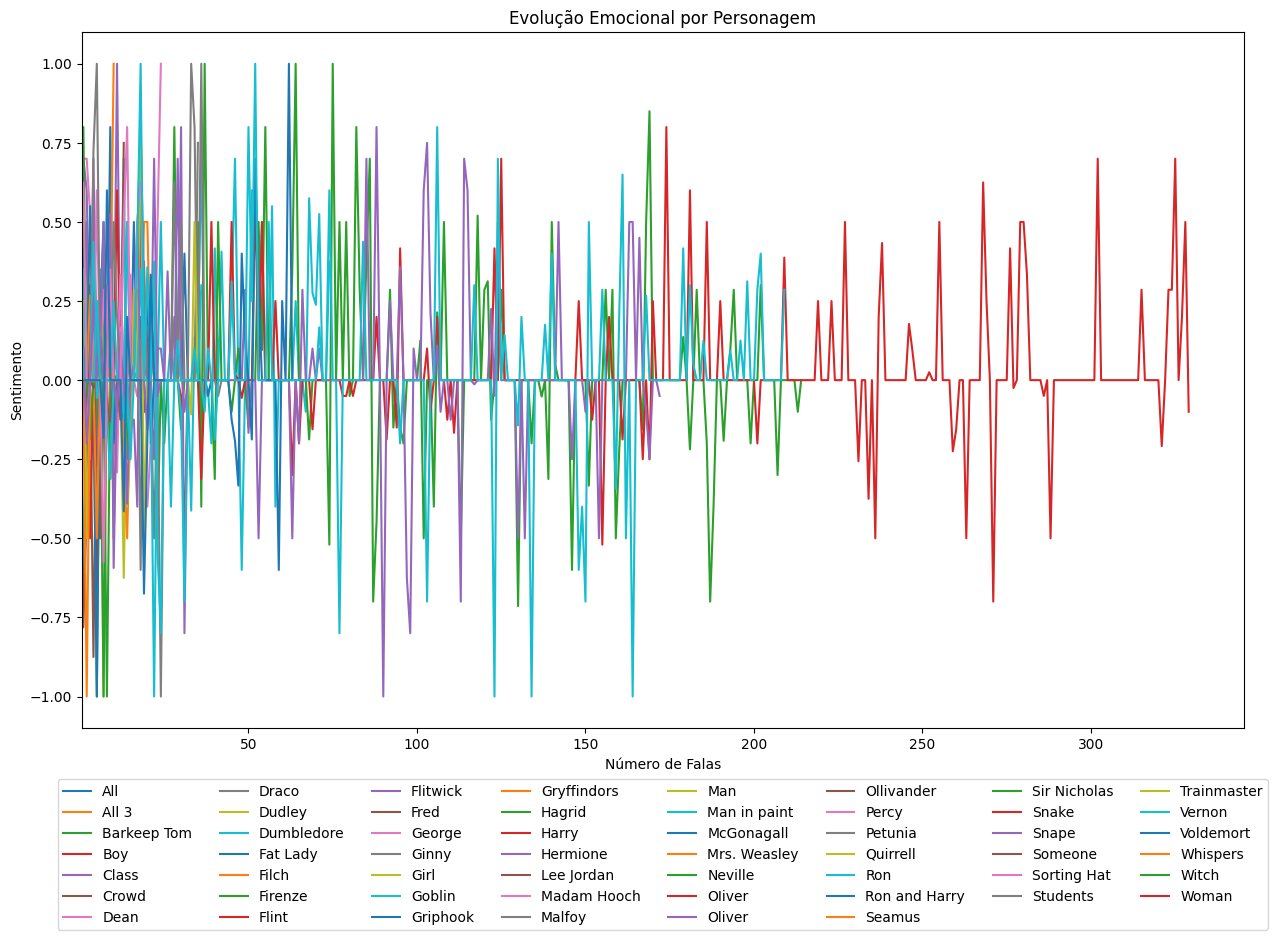

<Figure size 640x480 with 0 Axes>

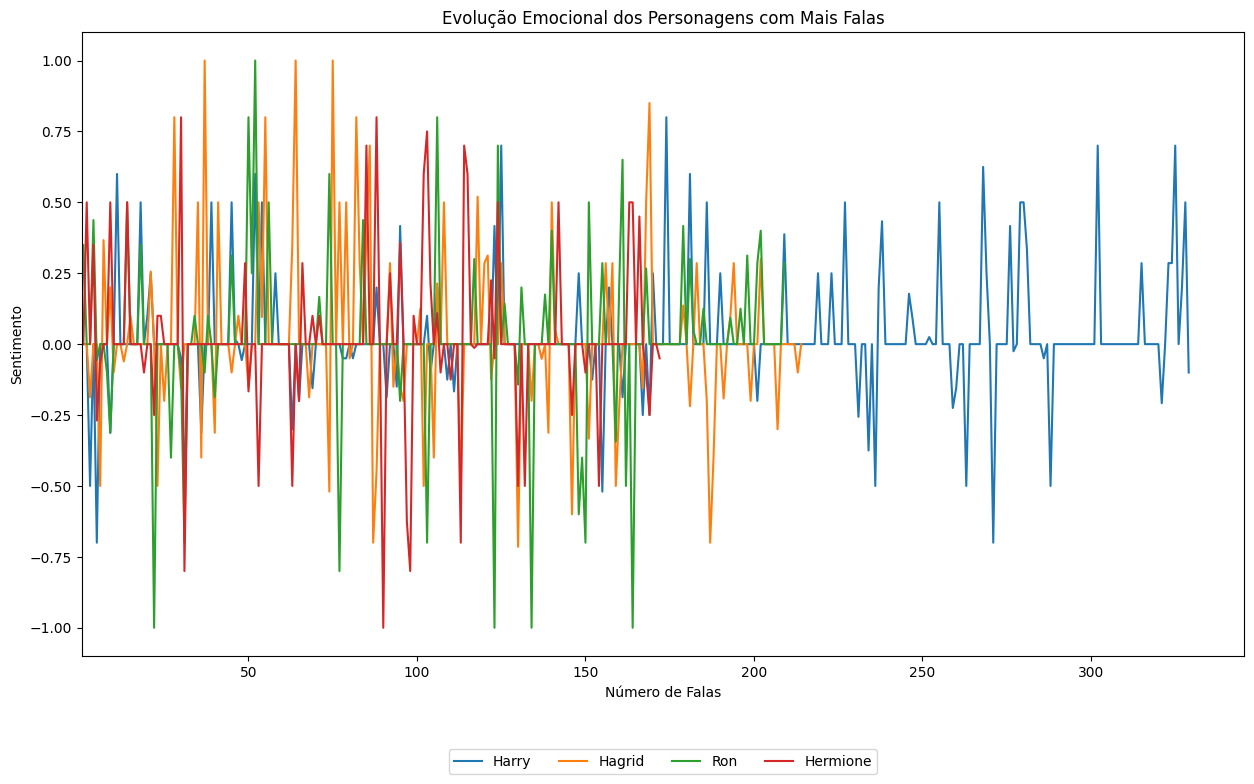

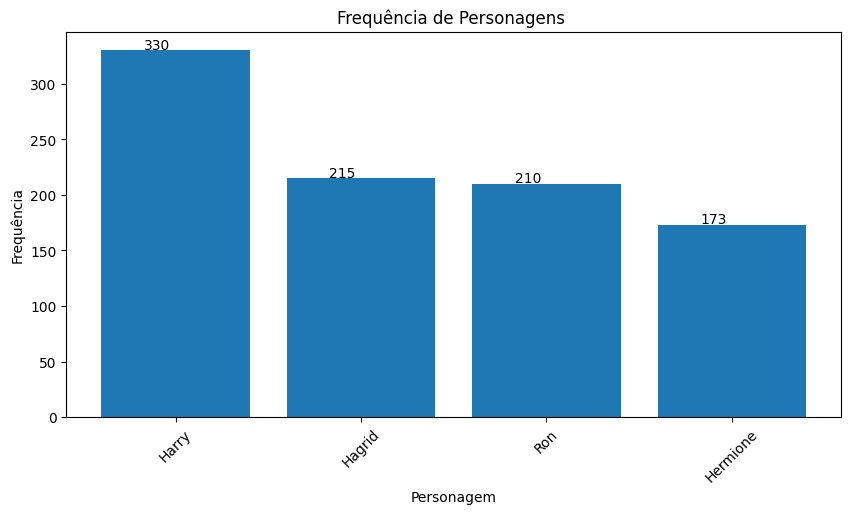

In [ ]:
def plot_bar_chart(sentiments_by_character):
    character_names = list(sentiments_by_character.keys())
    average_sentiments = [sum(sentiments) / len(sentiments) for sentiments in sentiments_by_character.values()]

    plt.figure(figsize=(14, 6))
    plt.bar(character_names, average_sentiments)
    plt.xlabel('Personagens')
    plt.ylabel('Média da Polaridade do Sentimento')
    plt.title('Média dos Sentimentos dos Personagens')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_individual_emotional_evolution(sentiments_by_character):
    for character, sentiments in sentiments_by_character.items():
        plt.figure(figsize=(10, 4))
        plt.plot(sentiments)
        plt.xlabel('Número de Falas')
        plt.ylabel('Sentimento')
        plt.title(f'Evolução Emocional de {character}')
        plt.show()

def plot_individual_emotional_histogram(sentiments_by_character):
    for character, sentiments in sentiments_by_character.items():
        plt.figure(figsize=(10, 4))
        sns.histplot(sentiments, kde=True)
        plt.xlabel('Sentimento')
        plt.ylabel('Frequência')
        plt.title(f'Distribuição de Sentimentos de {character}')
        plt.show()


#! pip uninstall nltk
#! pip install -U nltk
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from google.colab import files

# Configurar o logger
logging.basicConfig(level=logging.DEBUG, filename='/content/logfile.log', format='%(asctime)s - %(levelname)s - %(message)s', filemode='w', force=True)

# Carregar o arquivo de falas (nome do personagem || fala)
def load_dialogues(file_path):
    dialogues = [] # lista vazia
    '''!git clone https://github.com/katiacardoso/AI-Analysis-of-Harry-Potter
    #%cd AI-Analysis-of-Harry-Potter
    with open('Harry Potter 111.txt', 'r') as file:'''
    with open(file_path, 'r', encoding='utf-8') as file:
      line_count = 0  # Contador de linhas
      for line in file:
        for line in file:  # Lê cada linha do arquivo
            if line_count >= 1588:  # Interrompe o loop após 10 linhas
                break
            #print("Linha lida:", line)  # Imprime a linha para depuração
            #print("n° linha:", line_count)   #botar algo para mostrar a linha apenas quando der erro
            character, sentence = line.strip().split(";")  # Divide a linha em nome do personagem e fala
            #print("Nome do personagem:", character)  # Imprime o nome do personagem para depuração
            #print("Fala:", sentence)  # Imprime a fala para depuração
            dialogues.append((character, sentence))  # Adiciona (nome, fala) à lista de diálogos
            #print(f"Personagem adicionado: {character}")
            line_count += 1  # Incrementa o contador de linhas

    return dialogues  # Retorna a lista completa de diálogos

'''#remover personagens duplicados
def merge_similar_characters(dialogues):
    merged_dialogues = []

    for character, sentence in dialogues:
        character = character.strip()  # Remove espaços em branco extras no nome do personagem

        # Verifique se a lista já contém o personagem
        character_found = False
        for merged_character, merged_sentence in merged_dialogues:
            if character == merged_character:
                merged_sentence.append(sentence)
                character_found = True
                break

        if not character_found:
            merged_dialogues.append([character, [sentence]])

    return merged_dialogues'''

# Analisar sentimentos das falas
def analyze_sentiments(dialogues):
    sentiments_by_character = {} #cria um dicionario vazio
    unique_characters = set()  # Cria uma lista para personagens únicos

    for character, sentence in dialogues:
        character = character.strip()
        if character not in sentiments_by_character:
            sentiments_by_character[character] = []
            #unique_characters.add(character)  # Adicione o personagem à lista de personagens únicos
        else:
            logging.warning(f"-------Duplicidade encontrada para o personagem: {character}")
            pass

        blob = TextBlob(sentence)
        sentiment = blob.sentiment.polarity
        sentiments_by_character[character].append(sentiment)

        '''# Imprima a lista de personagens únicos
        logging.info("Personagens únicos na lista:")
        for character in unique_characters:
            logging.info(character)'''

    return sentiments_by_character

# Plotar gráfico da evolução emocional por personagem
def plot_emotional_evolution(sentiments_by_character):
    plt.figure(figsize=(15, 8))
    character_order = sorted(sentiments_by_character.keys())  # Cria uma lista ordenada dos personagens
    # Gráfico de linhas

    #for character, sentiments in sentiments_by_character.items():
    for character in character_order:
        sentiments = sentiments_by_character[character]
        plt.plot(sentiments, label=character)

    plt.xlabel('Número de Falas')
    plt.ylabel('Sentimento')
    plt.title('Evolução Emocional por Personagem')
    # Personalize os limites do eixo x para começar em zero
    plt.xlim(xmin=0.5)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=8) # Ajuste ncol para o número de colunas desejado
    plt.subplots_adjust(bottom=0.01)  # Ajuste esse valor conforme necessário

    plt.show()

    # Salve o gráfico em um arquivo externo (por exemplo, em formato PNG)
    plt.savefig('grafico_todos2.png')
    #files.download("grafico_todos2.png")  baixa automaticamente o gráfic



def plot_emotional_evolution_top(sentiments_by_character):
    plt.figure(figsize=(15, 8))

    # Classifique os personagens com base na contagem de suas falas
    character_frequencies = [(character, len(sentiments)) for character, sentiments in sentiments_by_character.items()]
    character_frequencies.sort(key=lambda x: x[1], reverse=True)
    top_n_characters = character_frequencies[:4]


    # Gráfico de linhas
    for character, _ in top_n_characters:
        sentiments = sentiments_by_character[character]
        plt.plot(sentiments, label=character)

    plt.xlabel('Número de Falas')
    plt.ylabel('Sentimento')
    plt.title('Evolução Emocional dos Personagens com Mais Falas')
    # Personalize os limites do eixo x para começar em zero
    plt.xlim(xmin=0.5)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4)  # Ajuste ncol conforme necessário
    plt.subplots_adjust(bottom=0.1)  # Ajuste esse valor conforme necessário



     # Gráfico de barras para mostrar a frequência de cada personagem
    characters, frequencies = zip(*top_n_characters)
    plt.figure(figsize=(10, 5))
    bars = plt.bar(characters, frequencies)
    plt.xlabel('Personagem')
    plt.ylabel('Frequência')
    plt.title('Frequência de Personagens ')
    plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade

    # Adicione rótulos numéricos acima de cada coluna
    for bar, frequency in zip(bars, frequencies):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, frequency + 1, str(frequency), ha='center', fontsize=10)

    plt.show()


def list_top_characters(dialogues, top_n=10):
    character_frequencies = {}  # Dicionário para armazenar o número de falas de cada personagem

    for character, _ in dialogues:
        if character in character_frequencies:
            character_frequencies[character] += 1
        else:
            character_frequencies[character] = 1

    # Classifique os personagens com base no número de falas
    sorted_characters = sorted(character_frequencies.items(), key=lambda x: x[1], reverse=True)

    # Lista os top N personagens
    top_characters = sorted_characters[:top_n]

    return top_characters

def plot_top_n_characters_speech(top_characters, top_n):
    characters, frequencies = zip(*top_characters)  # Separa os personagens e as frequências em listas separadas

    plt.figure(figsize=(12, 6))
    plt.bar(characters, frequencies)
    plt.xlabel('Personagens')
    plt.ylabel('Número de Falas')
    plt.title(f'Top {top_n} Personagens com Mais Falas')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_top_characters(top_n_characters, sentiments_by_character):
    characters, _ = zip(*top_n_characters)  # Separa os personagens em uma lista

    # Prepara os dados de sentimentos para os personagens selecionados
    data = [sentiments_by_character[character] for character in characters]

    # Calcula as médias dos sentimentos para cada personagem
    average_sentiments = [sum(sentiments) / len(sentiments) for sentiments in data]

    # Define os rótulos para as barras empilhadas
    labels = ['Positivo', 'Negativo', 'Neutro']

    # Transpõe os dados para que as colunas representem sentimentos
    data = list(zip(*data))

    plt.figure(figsize=(12, 6))
    bottom = [0] * len(characters)  # Variável auxiliar para controlar a base das barras empilhadas

    for i, label in enumerate(labels):
        plt.bar(characters, data[i], label=label, bottom=bottom)
        bottom = [bottom[j] + data[i][j] for j in range(len(characters))]  # Atualiza a base para a próxima categoria

    plt.xlabel('Personagens')
    plt.ylabel('Sentimento Médio')
    plt.title(f'Sentimentos dos {len(characters)} Personagens Principais')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    file_path = '/content/HarryPotter111.txt'
    dialogues = load_dialogues(file_path)
    '''dialogues = merge_similar_characters(dialogues)'''
    sentiments_by_character = analyze_sentiments(dialogues)



    '''top_characters = list_top_characters(dialogues)

    #Mostre os personagens com mais falas, para fins de menor detalhamento no gráfico
    print("Os 10 personagens com mais falas:")
    for character, frequency in top_characters:
        print(f"{character}: {frequency} falas")


    #top_n = 12  # Defina o valor de top_n aqui
    top_n_characters = list_top_characters(dialogues, top_n)

    #mostra os personagens com mais falas de uma forma mais dinâmica
    print(f"Os {top_n} personagens com mais falas:")
    for character in top_n_characters:
        print(f"{character}")


    #plotar o gráfico dos personagens com maiores falas de forma mais dinâmica
    plot_top_n_characters_speech(top_characters, top_n)

    # Chame a função para gerar o gráfico dos sentimentos dos top_n personagens
    plot_top_characters(top_n_characters, sentiments_by_character)

    '''




    # Escolha os personagens para os quais você deseja criar gráficos individuais
    characters_to_plot = ['Harry', 'Hagrid', 'Hermione', 'Ron']

  # Filtra os sentimentos para os personagens selecionados
    selected_sentiments = {character: sentiments_by_character[character] for character in characters_to_plot}

    # Crie gráficos individuais para cada personagem
    plot_individual_emotional_evolution(selected_sentiments)
    plot_individual_emotional_histogram(selected_sentiments)



    # Crie gráfico para todos os personagens
    plot_emotional_evolution(sentiments_by_character)
    #plot_bar_chart(sentiments_by_character)

    #  Crie gráfico para os personagens com maiores frequencias de fala
    plot_emotional_evolution_top(sentiments_by_character)


if __name__ == "__main__":
    main()